<a href="https://colab.research.google.com/github/wxi003/DataInsight/blob/main/Practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import percentile
%matplotlib inline


# Draw a Pie Chart

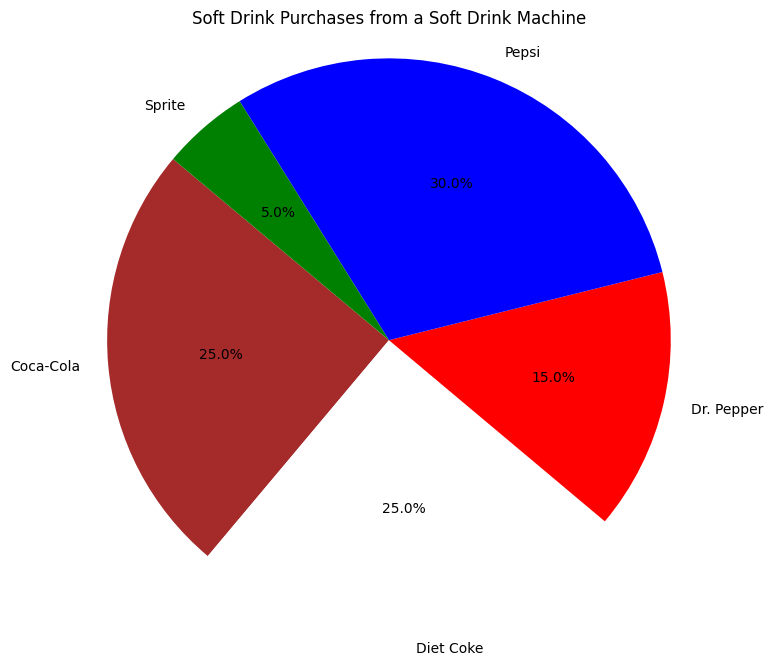

In [ ]:
labels = ['Coca-Cola', 'Diet Coke', 'Dr. Pepper', 'Pepsi', 'Sprite']
sizes = [25, 25, 15, 30, 5]
colors = ['brown', 'white', 'red', 'blue', 'green']
explode = (0, 0, 0, 0, 0)
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Soft Drink Purchases from a Soft Drink Machine')
plt.show()

# Draw a Bar chart

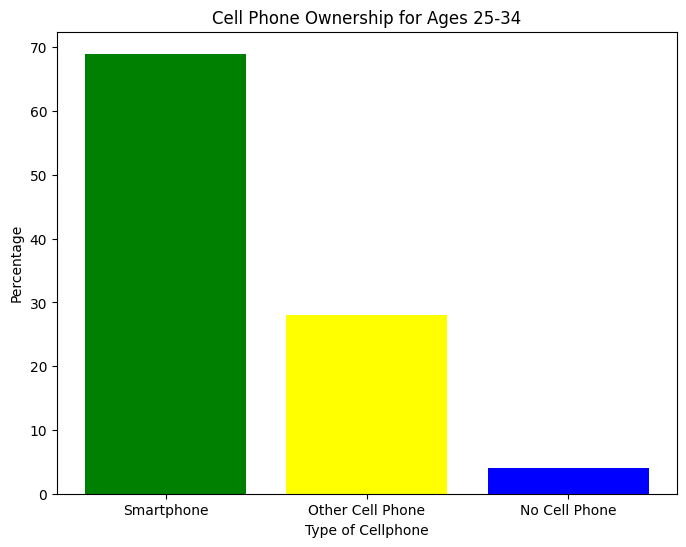

In [ ]:
categories = ['Smartphone', 'Other Cell Phone', 'No Cell Phone']
percentages = [69, 28, 4]

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['green', 'yellow', 'blue'])
plt.xlabel('Type of Cellphone')
plt.ylabel('Percentage')
plt.title('Cell Phone Ownership for Ages 25-34')
plt.show()


# Draw a bidimensional bar chart

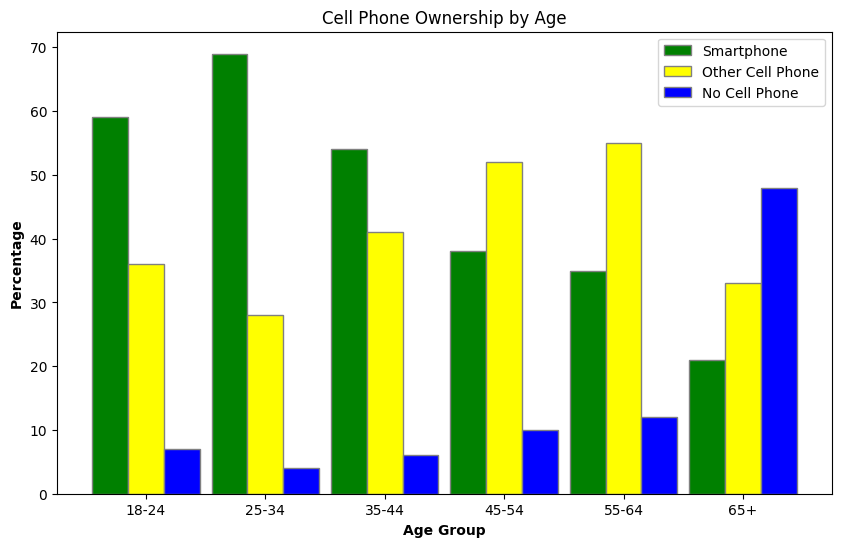

In [ ]:
age_groups = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
smartphone = [59, 69, 54, 38, 35, 21]
other_cell_phone = [36, 28, 41, 52, 55, 33]
no_cell_phone = [7, 4, 6, 10, 12, 48]

bar_width = 0.3
r1 = np.arange(len(age_groups))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, smartphone, color='green', width=bar_width, edgecolor='grey', label='Smartphone')
plt.bar(r2, other_cell_phone, color='yellow', width=bar_width, edgecolor='grey', label='Other Cell Phone')
plt.bar(r3, no_cell_phone, color='blue', width=bar_width, edgecolor='grey', label='No Cell Phone')

plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.title('Cell Phone Ownership by Age')
plt.xticks([r + bar_width for r in range(len(age_groups))], age_groups)

plt.legend()
plt.show()

# Make a histogram, using cars.csv

Saving cars.csv to cars (4).csv


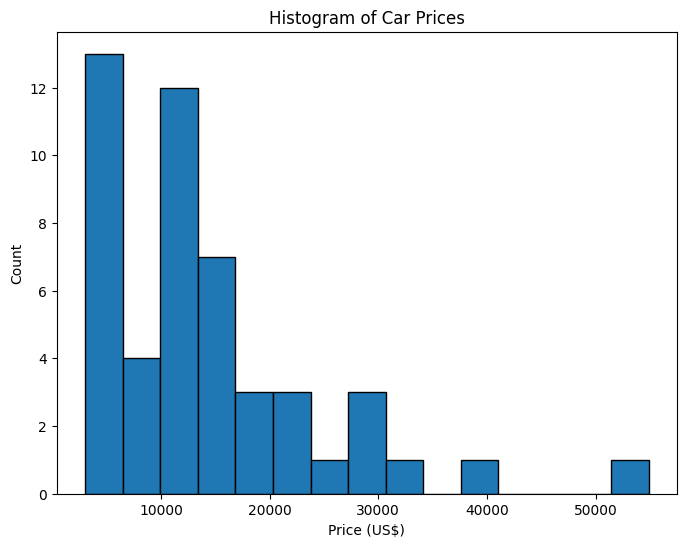

In [ ]:
from google.colab import files

uploaded = files.upload()
cars = pd.read_csv('cars.csv')

plt.figure(figsize=(8, 6))
plt.hist(cars['Price'], bins=15, edgecolor='black')
plt.xlabel('Price (US$)')
plt.ylabel('Count')
plt.title('Histogram of Car Prices')
plt.show()

# The shape of the distribution is right-skewed.

In [ ]:
count_over_45000 = len(cars[cars['Price'] > 45000])

print("The count of cars with prices exceeding $45,000 is", count_over_45000)


The count of cars with prices exceeding $45,000 is 1


In [ ]:
price_max = cars['Price'].max()
price_min = cars['Price'].min()

price_mean = cars['Price'].mean()
price_median = cars['Price'].median()

print("The Maximum price of cars is ", price_max)
print("The Minimum price of cars is ", price_min)
print("The Mean is ", round(price_mean, 2))
print("The Median is ", round(price_median, 2))


The Maximum price of cars is  54900
The Minimum price of cars is  2999
The Mean is  14526.71
The Median is  12610.0


Saving chol.csv to chol.csv


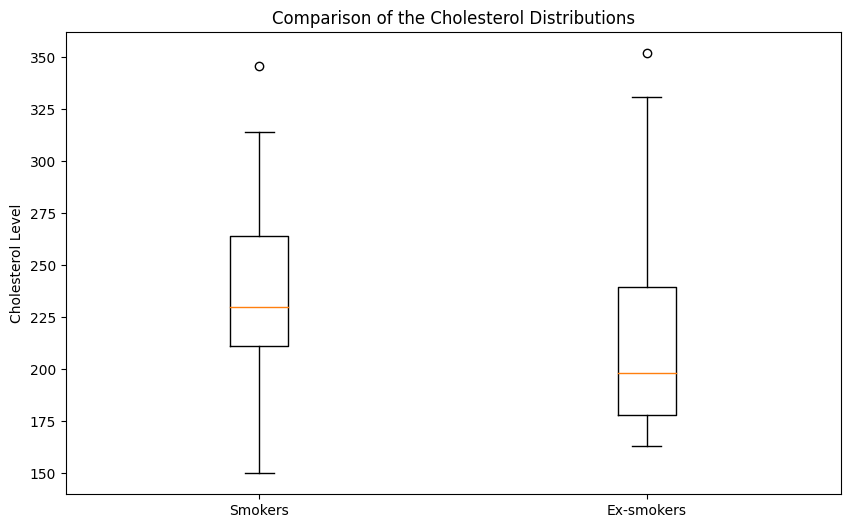

In [ ]:
uploaded = files.upload()
chol = pd.read_csv('chol.csv')

plt.figure(figsize=(10, 6))
plt.boxplot([chol['Smokers'], chol['Ex-smokers']], labels=['Smokers', 'Ex-smokers'])
plt.ylabel('Cholesterol Level')
plt.title('Comparison of the Cholesterol Distributions')
plt.show()


# Analysis Using chol.csv

In [ ]:
smokers = {
    'min': chol['Smokers'].min(),
    'Q1': chol['Smokers'].quantile(0.25),
    'median': chol['Smokers'].median(),
    'Q3': chol['Smokers'].quantile(0.75),
    'max': chol['Smokers'].max(),
    'count': chol['Smokers'].count(),
    'mean': round(chol['Smokers'].mean(),2),
    'standard deviation':  round(chol['Smokers'].std(),2)
}

ex_smokers = {
    'min': chol['Ex-smokers'].min(),
    'Q1': chol['Ex-smokers'].quantile(0.25),
    'median': chol['Ex-smokers'].median(),
    'Q3': chol['Ex-smokers'].quantile(0.75),
    'max': chol['Ex-smokers'].max(),
    'count': chol['Ex-smokers'].count(),
    'mean': round(chol['Ex-smokers'].mean() , 2),
    'standard deviation':  round(chol['Ex-smokers'].std() , 2)
}
print("Numerical summaries for Smokers")
for key, value in smokers.items():
    print(f"{key}: {value}")

print("\nNumerical summaries for Ex-smokers")
for key, value in ex_smokers.items():
    print(f"{key}: {value}")


Numerical summaries for Smokers
min: 150
Q1: 211.0
median: 230.0
Q3: 264.0
max: 346
count: 43
mean: 237.05
standard deviation: 41.61

Numerical summaries for Ex-smokers
min: 163
Q1: 178.0
median: 198.0
Q3: 239.5
max: 352
count: 43
mean: 216.44
standard deviation: 48.34


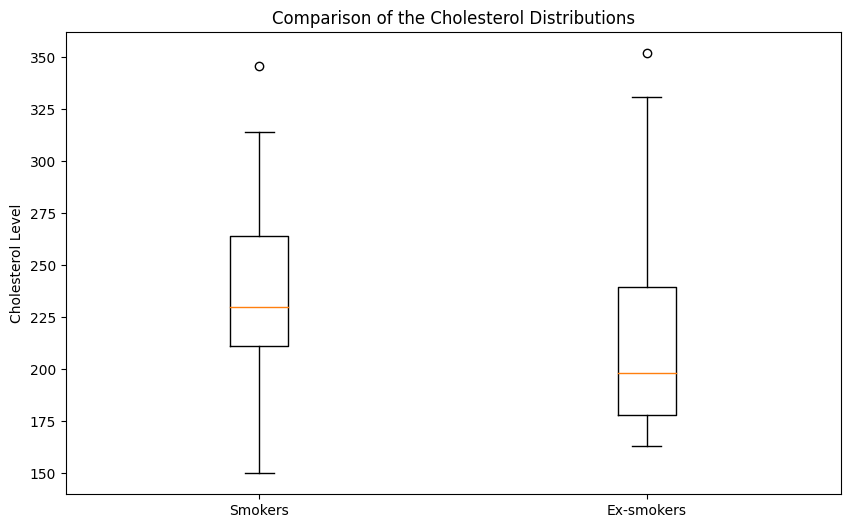

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([chol['Smokers'], chol['Ex-smokers']], labels=['Smokers', 'Ex-smokers'])
plt.ylabel('Cholesterol Level')
plt.title('Comparison of the Cholesterol Distributions')
plt.show()

From the box plots, we can identify one outlier in the smokers group and one outlier in the ex-smokers group. The values of these outliers are both around 350.

In [ ]:

smoke_Q1 = chol['Smokers'].quantile(0.25)
smoke_Q3 = chol['Smokers'].quantile(0.75)
smoke_IQR = smoke_Q3 - smoke_Q1
smoke_lower_bound = smoke_Q1 - 1.5 * smoke_IQR
smoke_upper_bound = smoke_Q3 + 1.5 * smoke_IQR
smoke_outliers = chol[(chol['Smokers'] < smoke_lower_bound) | (chol['Smokers'] > smoke_upper_bound)]

esmoke_Q1 = chol['Ex-smokers'].quantile(0.25)
esmoke_Q3 = chol['Ex-smokers'].quantile(0.75)
esmoke_IQR = esmoke_Q3 - esmoke_Q1
esmoke_lower_bound = esmoke_Q1 - 1.5 * esmoke_IQR
esmoke_upper_bound = esmoke_Q3 + 1.5 * esmoke_IQR
esmoke_outliers = chol[(chol['Ex-smokers'] < esmoke_lower_bound) | (chol['Ex-smokers'] > esmoke_upper_bound)]

smoke_outliers = smoke_outliers[['index', 'Smokers']].rename(columns={'index': 'Row Index', 'Smokers': 'outlier value'})
esmoke_outliers = esmoke_outliers[['index', 'Ex-smokers']].rename(columns={'index': 'Row Index', 'Ex-smokers': 'outlier value'})

smoke_outliers = smoke_outliers.drop_duplicates(subset=['Row Index'])
esmoke_outliers = esmoke_outliers.drop_duplicates(subset=['Row Index'])

print("Smokers: ")
print(smoke_outliers)
print("\n\nEx-smokers: ")
print(esmoke_outliers)


Smokers: 
    Row Index  outlier value
39         39            346


Ex-smokers: 
    Row Index  outlier value
15         15            352
